In [54]:
#!pip install pycryptodomex
#!pip install networkx
#!pip install pycrypto==2.6.1 

In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import hashlib
import time

### First generated address (MAIN)

### Second generated address

### Third generated address

In [ ]:
Task 2 Transaction ID:
d6dfa3afd4f543dfc6fd4a32ebb7d2933143dd3febeaf93b71cdc3934b901068

In [ ]:
Task 3 Transaction ID:
34bcfbdde9ce602a58a8e5bdb2ebf145c192e6511af742e2710328537d9c8f8f

In [ ]:
Task 4 Transaction ID:
d28e47f0e3de257227d4bd29140fa3aa7eadaf5c3bd1248e5f366f8840bf3ccc

In [ ]:
Task 5 Transaction ID:
c04c3913fb8f91d73bd6bc228b2ec66760381adc4e234003a1cedb834bacc4f7

# Task 1
### Calculate double Hash_256 of your name. Take two inputs from the user, i.e., first name and last name. Concatenate string and take SHA256(SHA256(first name+lastname))

In [52]:
first_name = 'Stanislav'
last_name = 'Krikunov'

def calculate_double_hash(string):
    first = hashlib.sha256(str(string).encode('utf-8')).hexdigest()
    second = hashlib.sha256(str(first).encode('utf-8')).hexdigest()
    return second

name = first_name+last_name
calculate_double_hash(name)

'6a66235f4fab277d07386b573172bd800f408c4a60b58ecacc580f9fa42e5f7c'

# Task 2
### Get some testnet Bitcoins to your testnet address_1 from any source. (Best source: https://coinfaucet.eu/en/btc-testnet/ (Links to an external site.)) . Provide the Transaction_ID.

### Transaction ID:
### d6dfa3afd4f543dfc6fd4a32ebb7d2933143dd3febeaf93b71cdc3934b901068

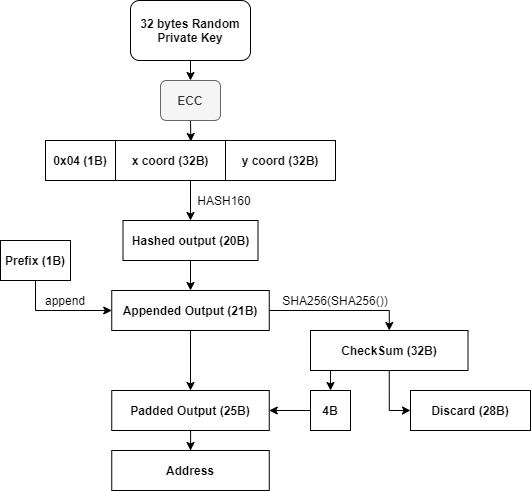

In [53]:
#!pip install base58
#!pip install ecdsa

In [1]:
import hashlib
import base58
import binascii

In [2]:
import random 

#Defining Function For Hashing: 1. Sha256 and 2. Ripemd160
def hashing(a):
    # creating sha256 hash obj
    first_sha256 = hashlib.sha256(a)    #why shouldn't we encode a???
    # creating hash RIPEMD-160 obj
    ripemd160 = hashlib.new("ripemd160")
    # hashing digest of prev obj
    ripemd160.update(first_sha256.digest())
    # getting digest
    return_0 = ripemd160.digest()

    #adding prefixes 
    return_1 = bytes.fromhex("00") + ripemd160.digest()
    return_2 = bytes.fromhex("6f") + ripemd160.digest()
    return return_0,return_1, return_2
    #return bytes.fromhex("34") + ripemd160.digest()

#Function for Checksum
def checksum(b):
    #double hasing with sha256
    checksum_full = hashlib.sha256(hashlib.sha256(b).digest()).digest()
    #cut first 4 bytes
    new_checksum = checksum_full[:4]
    # concat and return
    return b + new_checksum

#Function to convert to base58    
def to_base58(c):
    return base58.b58encode(c).decode('utf-8')

def compressed_key(d):
    a = d.hex()

    if a[-1] == '0' or a[-1] == '2' or a[-1] == '4' or a[-1] == '6' or a[-1] == '8' or a[-1] == 'a' or a[-1] == 'c' or a[-1] == 'e':
        return bytes.fromhex("02") + d
    
    else:
        return bytes.fromhex("03") + d

### Generating random Private key

In [3]:
import os
# Generating 32 byte Private key
private_key = os.urandom(32).hex()
private_key_from_hex = bytes.fromhex(private_key)

print("HEX private key:",private_key)
print("DEC private key:",int(private_key,16))

HEX private key: 14097ad77fbbbee8690498c9d05b91322697f51206aa14ccc9d07b5e3389676e
DEC private key: 9063006418143070269654929483345457856170106143443630597555538693235294168942


### ECC x and y coordinates

In [4]:
import ecdsa
sk = ecdsa.SigningKey.from_string(private_key_from_hex, curve = ecdsa.SECP256k1) 

#actual publickey to verify messages that singed using own pvt key
verification_key = sk.verifying_key
#print(verification_key.to_string().hex()) #length 128 (64 bytes + 64 bytes)
print("x: ",verification_key.to_string().hex()[:64])
print("y: ",verification_key.to_string().hex()[64:])

x:  bff848a9489d6017290bbcc51a24161777f858423f9d566d29ae2370ef50b38c
y:  d1d857d8ac6906a1440832c3f67c550240c275f63f99c6cc2ab3c2a9224c74a7


### Generating Public key

In [5]:
#making Public Key:
public_key = bytes.fromhex("04") + verification_key.to_string()
print("Uncompresses Public Key:\n" + public_key.hex())

Uncompresses Public Key:
04bff848a9489d6017290bbcc51a24161777f858423f9d566d29ae2370ef50b38cd1d857d8ac6906a1440832c3f67c550240c275f63f99c6cc2ab3c2a9224c74a7


In [6]:
compressed_public_key = compressed_key(verification_key.to_string())
compressed_public_key_hex = compressed_public_key.hex()[:66]
print("compressed_public:\n" + compressed_public_key_hex)

compressed_public:
03bff848a9489d6017290bbcc51a24161777f858423f9d566d29ae2370ef50b38c


In [7]:
decoded_pubkey, mainnet_pubkey, testnet_pubkey = hashing(public_key)
print("Public Key Before Appending:", decoded_pubkey.hex())

Public Key Before Appending: d4207eb81d7da8fe65af4e09cf97b20c676d1277


In [8]:
#DECODED PUBLIC KEY WILL BE REQUIRED
print("Public Key Before Appending:", decoded_pubkey.hex())

#Appending '00' for mainnet public_key
print("\nAppending 00")
print("Mainnet_public_key:",mainnet_pubkey.hex())

#checksum:
print('\nChecksum')
checksum_main_pubkey = checksum(mainnet_pubkey)
print(checksum_main_pubkey.hex())

print('\nBase58 Address')
main_address = to_base58(checksum_main_pubkey)
print(main_address)

Public Key Before Appending: d4207eb81d7da8fe65af4e09cf97b20c676d1277

Appending 00
Mainnet_public_key: 00d4207eb81d7da8fe65af4e09cf97b20c676d1277

Checksum
00d4207eb81d7da8fe65af4e09cf97b20c676d1277b0685608

Base58 Address
1LLdBTgVAw6SLdXncnvGtPixHq4X8Z1wcb


In [9]:
#DECODED PUBLIC KEY WILL BE REQUIRED
print("Public Key Before Appending:", decoded_pubkey.hex())

#Appending '6f' for testnet public_key
print("\nAppending 6f")
print("Mainnet_public_key:",testnet_pubkey.hex())

#checksum:
print('\nChecksum')
checksum_test_pubkey = checksum(testnet_pubkey)
print(checksum_test_pubkey.hex())

print('\nBase58 Address')
test_address = to_base58(checksum_test_pubkey)
print(test_address)

Public Key Before Appending: d4207eb81d7da8fe65af4e09cf97b20c676d1277

Appending 6f
Mainnet_public_key: 6fd4207eb81d7da8fe65af4e09cf97b20c676d1277

Checksum
6fd4207eb81d7da8fe65af4e09cf97b20c676d1277754ff545

Base58 Address
mzraUWmTyxXh7k1QLMteiJwH9pfE239xB6


### Print generated data

In [10]:
print('''
________________NEW DATA________________
Private Key: {} 
Public Key: {} 
Compressed_Key: {} 
MainNet Address: {} 
Testnet Address: {}'''.format(private_key,public_key.hex(),compressed_public_key_hex,main_address,test_address))


________________NEW DATA________________
Private Key: 14097ad77fbbbee8690498c9d05b91322697f51206aa14ccc9d07b5e3389676e 
Public Key: 04bff848a9489d6017290bbcc51a24161777f858423f9d566d29ae2370ef50b38cd1d857d8ac6906a1440832c3f67c550240c275f63f99c6cc2ab3c2a9224c74a7 
Compressed_Key: 03bff848a9489d6017290bbcc51a24161777f858423f9d566d29ae2370ef50b38c 
MainNet Address: 1LLdBTgVAw6SLdXncnvGtPixHq4X8Z1wcb 
Testnet Address: mzraUWmTyxXh7k1QLMteiJwH9pfE239xB6


### First generated address (MAIN)

### Get some bitcoins from:
https://coinfaucet.eu/en/btc-testnet/?__cf_chl_jschl_tk__=f33f8febef7de7189c691c2e7b1b9cece750dd07-1605821323-0-ASrbIy_z3VwWSaom8LNTOg-fQHjK8SAFbNQm3StLwbFFwt6XZ34Q_jqVI_vZVz_J15zYSAi8YWltRYBkxSRsuIX9Yz_dNProc1G8WT9QG-ECF8EdV1I9exRimUh1K-kmskTXhvawrIhchwu9XxCkmlxg4563DAbobIB2X-bgUpB1rd-03sq_RgC6xdYtKMvosplC-cTlWqyn7a1YNEF7iZ9NLYGIkK1NaGE9kn9TqbTHN9IUl8mBh1MPDklBFbvZ0Szc78LWOUFltco1Lw-0MRae0alDeLO446yKUgFDMIruAVxA2X7vM7MAZXQ0puh7C-PsMHFsZkHG1yhYQO4VgIg

### Second generated address

### Third generated address

### Testnet link

# https://tbtc.bitaps.com/

# Task 3

### Create a new transaction from address_1 and provide Transaction_ID. Make 2 outputs: Output_1: Some bitcoins to address_2. Output_2: Data transfer i.e. First 4 Bytes double Hash_256 of your name. You can send 0 bitcoins in this output.

### Transaction ID:
### 34bcfbdde9ce602a58a8e5bdb2ebf145c192e6511af742e2710328537d9c8f8f

In [56]:
#!pip install base58
#!pip install ecdsa
#!pip install prettytable

In [49]:
#Defining Libraries:
import hashlib
import base58
import os
import hashlib
import ecdsa
import binascii
from ecdsa import SigningKey, SECP256k1
from prettytable import PrettyTable

In [35]:
class variableInteger():    
    def reverse_string_in_pair(a_str_ip):
        i = 0
        rev_a = []
        while i != len(a_str_ip):
            #print(a[i] + a[i+1])
            temp_value = a_str_ip[i] + a_str_ip[i+1]
            rev_a.append(temp_value)
            i = i + 2
        rev_a.reverse()
        return ''.join(rev_a)

    def padding(b):
        if int(len(b) % 2) == 0:
            return b
        else:
            return '0' + b

    def variable_integer(a):
        temp = int(len(a)/2)
        if temp <= int('0xfc',16):
            return hex(temp)[2:]
        elif temp > int('0xfc',16) and temp <= int('0xffff',16):
            return 'fd' +  reverse_string_in_pair(padding(hex(temp)[2:]))
        elif temp > int('0xffff',16) and temp <= int('0xffffffff',16):
            return 'fe' + reverse_string_in_pair(padding(hex(temp)[2:]))
        elif temp > int('0xffffffff',16) and temp <= int('0xffffffffffffffff',16):
            return 'ff' + reverse_string_in_pair(padding(hex(temp)[2:]))

In [36]:
def bytewise_reverse(hex_string):
    i = 0
    reverted_string = []
    while i != len(hex_string):
        temp_value = hex_string[i] + hex_string[i+1]
        reverted_string.append(temp_value)
        i = i + 2
    reverted_string.reverse()
    return ''.join(reverted_string)

def decode_raw_transaction(raw_transaction):
    print('''
===============================
Decode raw transaction''')
    print(raw_transaction)
    print('''
================================''')
    print('''
***Values are in reverse byte format!***''')
    version_number_string = raw_transaction[:8]
    print("Version number, 4 bytes: ", 
          version_number_string, 
          " (",
          int(bytewise_reverse(version_number_string), 16), 
          ")")
    print("Flag (optional), 0 or 2 bytes: Empty") # only Empty is supported in this function
    print('''
****************************
***Input info starts here***
****************************''')
    number_of_inputs_string = raw_transaction[8:10]
    number_of_inputs = int(number_of_inputs_string, 16)
    print("Number of inputs, variable length integer 1-9 bytes: ", number_of_inputs_string, 
          " (",
          number_of_inputs, 
          ")") # only < 0xFD is supported in this function
    next_symbol_to_read = 10
    for input_index in range(number_of_inputs):
        print("***Input_" + str(input_index), "***")
        print("Previous output tx hash, 32 bytes: ", raw_transaction[next_symbol_to_read:next_symbol_to_read + 64],
             " (",
              bytewise_reverse(raw_transaction[next_symbol_to_read:next_symbol_to_read + 64]), 
              ")")
        next_symbol_to_read = next_symbol_to_read + 64
        print("Previous tx output index, 4 bytes: ", raw_transaction[next_symbol_to_read:next_symbol_to_read + 8],
             " (",
              int(bytewise_reverse(raw_transaction[next_symbol_to_read:next_symbol_to_read + 8]), 16), 
              ")")
        next_symbol_to_read = next_symbol_to_read + 8
        current_signature_size_string = raw_transaction[next_symbol_to_read:next_symbol_to_read + 2] # only <0xFD is supported
        current_signature_size = int(bytewise_reverse(current_signature_size_string), 16)
        print("Sig script size in bytes, variable length integer 1-9 bytes: ", current_signature_size_string,
              " (",
              current_signature_size,
              ")")
        next_symbol_to_read = next_symbol_to_read + 2
        sig_script_string = raw_transaction[next_symbol_to_read:next_symbol_to_read + current_signature_size * 2]
        print("Sig script: ", sig_script_string)
        next_symbol_to_read = next_symbol_to_read + current_signature_size * 2
        print("Sequence number, 4 bytes: ffffffff")
        next_symbol_to_read = next_symbol_to_read + 8
    print('''
****************************
***Output info starts here***
****************************''')
    number_of_outputs_string = raw_transaction[next_symbol_to_read:next_symbol_to_read + 2]
    number_of_outputs = int(number_of_outputs_string, 16)
    print("Number of outputs, variable length integer 1-9 bytes: ", 
          number_of_outputs_string, 
          " (",
          number_of_outputs, 
          ")") # only 1 byte is supported
    next_symbol_to_read = next_symbol_to_read + 2
    for output_index in range(number_of_outputs):
        print("***Output_" + str(output_index), "***")
        amount_string = raw_transaction[next_symbol_to_read:next_symbol_to_read + 16]
        print("Amount in satoshi, 8 bytes: ", 
              amount_string, 
              "( ", 
              int(bytewise_reverse(amount_string), 16), 
              " )")
        next_symbol_to_read = next_symbol_to_read + 16
        output_script_size_string = raw_transaction[next_symbol_to_read:next_symbol_to_read + 2] # only <0xFD is supported
        output_script_size = int(bytewise_reverse(output_script_size_string), 16)
        print("Output script size in bytes, variable length integer 1-9 bytes: ", output_script_size_string,
              " (",
              output_script_size,
              ")")
        next_symbol_to_read = next_symbol_to_read + 2
        output_script_string = raw_transaction[next_symbol_to_read:next_symbol_to_read + output_script_size * 2]
        print("Script hash: ", 
              output_script_string)
        next_symbol_to_read = next_symbol_to_read + output_script_size * 2
    print('''
****************************''')
    locktime_string = raw_transaction[next_symbol_to_read:next_symbol_to_read + 8]
    locktime = int(bytewise_reverse(locktime_string), 16)
    print("Locktime, 4 bytes: ",  locktime_string, "( ", locktime, " )")
    next_symbol_to_read = next_symbol_to_read + 8

In [37]:
def doublehash256_txid(a): 
   temp_bin = binascii.unhexlify(a)
   temp_hash = hashlib.sha256(temp_bin).digest()
   hash2 = hashlib.sha256(temp_hash).digest()
   return str(binascii.hexlify(hash2),"ascii")

def bitcoin_satoshi_rev_hex(btc):
    temp = float(btc) * (10**8)
    temp_1 = hex(int(temp))[2:]
    temp_2 = bytewise_reverse(str(temp_1).zfill(16))
    return temp_2

def tx_inputs_tx_id():
    previous_tx_hash = input("Enter Reference TxId: ")
    previous_tx_hash_reversed = bytewise_reverse(previous_tx_hash)
    previous_output_index = input("Enter Previous output index: ")
    previous_output_index = bytewise_reverse('{:08x}'.format(int(previous_output_index)))
    return previous_tx_hash_reversed + previous_output_index + place_holder() +  'ffffffff'

def place_holder():
    previous_place_holder = input('''Enter Output Script 
    OP_HASH160(public_key)=RIPEMD160(SHA256(public_key)): ''')
    size_receiver_1 = hex(int(len(previous_place_holder)/2))[2:]
    script_Pubkey_prev_op = '76' + 'a9' + size_receiver_1 + previous_place_holder + '88' + 'ac'
    script_len_1 = hex(int(len(script_Pubkey_prev_op)/2))[2:]
    return script_len_1 + script_Pubkey_prev_op

def tx_outputs(c):
    receiver = input("Enter Receiver's Address {}: ".format(c+1))
    if receiver[0] == 'm' or receiver[0] == 'n': 
        value = input("Enter Value in BTC (0.0) to send {}:".format(receiver))
        value_in_hex_NYB = bitcoin_satoshi_rev_hex(value)
        receiver_address = base58.b58decode(receiver).hex()[2:-8]
        locking_Script = '76' + 'a9' + variableInteger.variable_integer(receiver_address) + receiver_address + '88' + 'ac'
        script_len_2 = variableInteger.variable_integer(locking_Script)
        return value_in_hex_NYB + script_len_2 + locking_Script
    
    elif receiver[0] == '2':
        value = input("Enter Value in BTC (0.0) to send {}:".format(receiver))
        value_in_hex_NYB = bitcoin_satoshi_rev_hex(value)
        receiver_address = base58.b58decode(receiver).hex()[2:-8]
        locking_Script = 'a9' + variableInteger.variable_integer(receiver_address) + receiver_address + '87'
        script_len_2 = variableInteger.variable_integer(locking_Script)
        return value_in_hex_NYB + script_len_2 + locking_Script
    
def generate_raw_transaction(print_output = True):
    #Creating Raw Transaction for Double Hash
    #P2PKH
    version = 1
    version = bytewise_reverse('{:08d}'.format(int(version)))

    #_________________TALKING PREVIOUS TRANSACTIONS_________________
    utxo_ip = '01'
    prev_tx_datas = utxo_ip + tx_inputs_tx_id()


    #___________________________________________________________________
    utxo_output = input("Enter number of outputs, for example, 2: ")
    tx_output = ''
    for i in range(0, int(utxo_output)):
            tx_output = tx_outputs(i) + tx_output
    next_output_data = '0' + utxo_output + tx_output
    #____________________________________________________________________________

    locktime = '00000000'
    SigHashCode = '01000000'


    #Creating Raw transaction:
    print(
    """
    Raw_Transaction for 1 input Data and {} Output
    """.format(tx_output))
    #Printing Input PreSignature:
    
    raw_transaction = version + prev_tx_datas + next_output_data + locktime + SigHashCode
    if print_output:
        print(f'''
        Version {version}
        Previous data: {prev_tx_datas}
        Next output data: {next_output_data} 
        Locktime: {locktime} 
        SigHashCode: {SigHashCode}
        ''')
        print(raw_transaction)
    return(raw_transaction)    

In [38]:
raw_transaction = generate_raw_transaction()

Enter Reference TxId: d6dfa3afd4f543dfc6fd4a32ebb7d2933143dd3febeaf93b71cdc3934b901068
Enter Previous output index: 0
Enter Output Script 
    OP_HASH160(public_key)=RIPEMD160(SHA256(public_key)): 2e35a9f082da33fb1d10c5dfb9bd0e0e2c28c83d
Enter number of outputs, for example, 2: 2
Enter Receiver's Address 1: mub9J6gfnKi4aTd9NpXdV4iTrzV5pcgRu7
Enter Value in BTC (0.0) to send mub9J6gfnKi4aTd9NpXdV4iTrzV5pcgRu7:0.005
Enter Receiver's Address 2: mjjHfWKD2gBWHvTB8Xi699hTN4DH8HRBqK
Enter Value in BTC (0.0) to send mjjHfWKD2gBWHvTB8Xi699hTN4DH8HRBqK:0.005

    Raw_Transaction for 1 input Data and 20a10700000000001976a9142e35a9f082da33fb1d10c5dfb9bd0e0e2c28c83d88ac20a10700000000001976a9149a5c9b98eee7c02f376525e55112267092797ad488ac Output
    

        Version 01000000
        Previous data: 016810904b93c3cd713bf9eaeb3fdd433193d2b7eb324afdc6df43f5d4afa3dfd6000000001976a9142e35a9f082da33fb1d10c5dfb9bd0e0e2c28c83d88acffffffff
        Next output data: 0220a10700000000001976a9142e35a9f082da33fb1d

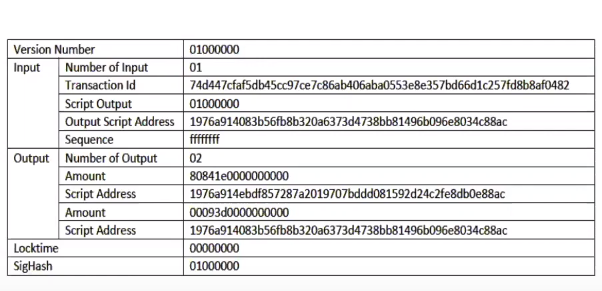

In [39]:
decode_raw_transaction(raw_transaction)


Decode raw transaction
01000000016810904b93c3cd713bf9eaeb3fdd433193d2b7eb324afdc6df43f5d4afa3dfd6000000001976a9142e35a9f082da33fb1d10c5dfb9bd0e0e2c28c83d88acffffffff0220a10700000000001976a9142e35a9f082da33fb1d10c5dfb9bd0e0e2c28c83d88ac20a10700000000001976a9149a5c9b98eee7c02f376525e55112267092797ad488ac0000000001000000


***Values are in reverse byte format!***
Version number, 4 bytes:  01000000  ( 1 )
Flag (optional), 0 or 2 bytes: Empty

****************************
***Input info starts here***
****************************
Number of inputs, variable length integer 1-9 bytes:  01  ( 1 )
***Input_0 ***
Previous output tx hash, 32 bytes:  6810904b93c3cd713bf9eaeb3fdd433193d2b7eb324afdc6df43f5d4afa3dfd6  ( d6dfa3afd4f543dfc6fd4a32ebb7d2933143dd3febeaf93b71cdc3934b901068 )
Previous tx output index, 4 bytes:  00000000  ( 0 )
Sig script size in bytes, variable length integer 1-9 bytes:  19  ( 25 )
Sig script:  76a9142e35a9f082da33fb1d10c5dfb9bd0e0e2c28c83d88ac
Sequence number, 4 bytes: ffff

In [40]:
def sign_raw_transaction(print_output = True):
    unsigned = input("Enter Raw data Transaction: ")

    temp_bin = binascii.unhexlify(unsigned)
    temp_hash = hashlib.sha256(temp_bin).digest()
    hash2 = hashlib.sha256(temp_hash).hexdigest()
    tx_hash = hashlib.sha256(temp_hash).digest()

    private_key = input("Enter Signing Private Key: ")
    signingKey = ecdsa.SigningKey.from_string(bytes.fromhex(private_key), curve=ecdsa.SECP256k1)
    SIG = signingKey.sign_digest(tx_hash, sigencode=ecdsa.util.sigencode_der_canonize)
    SIG = str(binascii.hexlify(SIG),'ascii')
    if print_output:
        print("\n\nSig Script: ", SIG)
    return(SIG)

In [41]:
signature = sign_raw_transaction()

Enter Raw data Transaction: 01000000016810904b93c3cd713bf9eaeb3fdd433193d2b7eb324afdc6df43f5d4afa3dfd6000000001976a9142e35a9f082da33fb1d10c5dfb9bd0e0e2c28c83d88acffffffff0220a10700000000001976a9142e35a9f082da33fb1d10c5dfb9bd0e0e2c28c83d88ac20a10700000000001976a9149a5c9b98eee7c02f376525e55112267092797ad488ac0000000001000000
Enter Signing Private Key: 48eb4f7b56a0b3b90edb6aab2e071b8fbf941ce81dc97d2325a950c3fd6a4131


Sig Script:  304402200f072a0b633288874d80e2a375d5ce216bc32463145c27db3a6de87a15711cbf0220781dbfcf8ddaa433ac0591a015e50fe20c2957c14b5e8b3a5eb08d3c59e82ec5


In [44]:
# Exploring Signature
def decode_digital_signature():
    #_______Digital Signature Decoder__________
    DER_input =  input("Enter Digital Signature, for example, 3045022100cd89b747b9507cb525c5d2d48aa7ebc8941c257621219471dab1e23c6280f99502204823508b23dc61e2868c120f1b90da864902266a3d2ae087720d26e5313d788a: ")
    print("\n")

    #Variables:
    header = DER_input[0:2]
    Sig_Length = DER_input[2:4]
    r_integer = DER_input[4:6]
    r_length = DER_input[6:8]
    r = DER_input[8:8 + 2 * int(r_length,16)]
    s_integer = DER_input[8 + 2 * int(r_length,16): 10 + 2 * int(r_length,16)]
    s_length = DER_input[10 + 2 * int(r_length,16): 12 + 2 * int(r_length,16)]
    s = DER_input[12 + 2 * int(r_length,16):]

    print("\033[4mDECODING DIGITAL SIGNATURE\033[0m\n")
    x = PrettyTable()
    x.field_names = ["Fields","Value (in Hex)"]
    x.add_row(["Header",header])
    x.add_row(["Sig Length",Sig_Length])
    x.add_row(["Integer",r_integer])
    x.add_row(["R Length",r_length])
    x.add_row(["R",r])
    x.add_row(["Integer",s_integer])
    x.add_row(["S Length",s_length])
    x.add_row(["S",s])
    print(x)


    #_____DER_SIG_SCRIPT_ENCODER____________
    def pushdata(len_r, len_s):
        if len_r == '20' and len_s == '20':
            return str(47)    
        elif len_r == '20' or len_s == '21':
            return str(48)
        elif len_r == '21' or len_s == '20':
            return str(48)
        else:
            return str(49)

    def pubkey_opcode(a):
        return hex(int(int(len(a))/2))[2:]



    pushdata_opcode = pushdata(r_length, s_length)
    sighash_code = '01'

    publickey = input("Enter Publickey (Compressed or Uncompressed), for example, 049ea82ac663a76fb872d4a49674762c3f9e60e25d55f7636d76b03efef3d69e838ab749455d3951aa015ccac729ecd9d656e596686af6204534821699e779534b: ")
    pubkey_pushdata_opcode = pubkey_opcode(publickey)

    y = PrettyTable()

    print("\033[4mSIG SCRIPT\033[0m\n")
    y.field_names = ["Fields","Value (in Hex)"]
    y.add_row(["PUSHDATA Opcode",pushdata_opcode])
    y.add_row(["Header",header])
    y.add_row(["Sig Length",Sig_Length])
    y.add_row(["Integer",r_integer])
    y.add_row(["R Length",r_length])
    y.add_row(["R",r])
    y.add_row(["Integer",s_integer])
    y.add_row(["S Length",s_length])
    y.add_row(["S",s])
    y.add_row(["------","------"])
    y.add_row(["SigHash Code",sighash_code])
    y.add_row(["PUSHDATA Opcode",pubkey_pushdata_opcode])
    y.add_row(["Public Key",publickey])

    print(y)

    final_SigScript = pushdata_opcode + header + Sig_Length + r_integer + r_length + r + s_integer + s_length + s + sighash_code + pubkey_pushdata_opcode + publickey
    z = PrettyTable()
    z.field_names = ["Fields","Value (in Hex)"]
    z.add_row(["SigScript Lenght",pushdata_opcode])
    z.add_row(["Final SigScript",final_SigScript])

    print(z)
    print("\nSigScript(hex): ",pubkey_opcode(final_SigScript) + final_SigScript,"\n\n\n")

In [50]:
decode_digital_signature()

Enter Digital Signature, for example, 3045022100cd89b747b9507cb525c5d2d48aa7ebc8941c257621219471dab1e23c6280f99502204823508b23dc61e2868c120f1b90da864902266a3d2ae087720d26e5313d788a: 304402200f072a0b633288874d80e2a375d5ce216bc32463145c27db3a6de87a15711cbf0220781dbfcf8ddaa433ac0591a015e50fe20c2957c14b5e8b3a5eb08d3c59e82ec5


DECODING DIGITAL SIGNATURE

+------------+------------------------------------------------------------------+
|   Fields   |                          Value (in Hex)                          |
+------------+------------------------------------------------------------------+
|   Header   |                                30                                |
| Sig Length |                                44                                |
|  Integer   |                                02                                |
|  R Length  |                                20                                |
|     R      | 0f072a0b633288874d80e2a375d5ce216bc32463145c27db3a6de87a15

### 1) Decode raw transaction:

### 2) Cut it into several parts:

### 3) Delete last line

### 4) Get digital signature:

### 5) Replace 5th line to digital signature:

### 6) Assembly this in a single line:

### 7) Put it into 
https://live.blockcypher.com/btc-testnet/tx/34bcfbdde9ce602a58a8e5bdb2ebf145c192e6511af742e2710328537d9c8f8f/

# Task 4

In [15]:
# !pip install bitcoin

In [16]:
import bitcoin
import base58
import hashlib

#definging functions:
def public_to_test(a):
    decoded_address = base58.b58decode(scriptaddress)
    address_1 = decoded_address[1:-4]
    hex_address = bytes.fromhex("C4") + address_1
    checksum_test_multsig = checksum(hex_address)
    test_address = to_base58(checksum_test_multsig)
    return test_address
    
def checksum(b):
    checksum_full = hashlib.sha256(hashlib.sha256(b).digest()).digest()
    new_checksum = checksum_full[:4]
    return b + new_checksum

def to_base58(c):
    return base58.b58encode(c).decode('utf-8')

## Generate you multisig address

In [17]:
print("Generating MultiSig Address and Test Address M:N")
m = int(input("Enter N (Max), for example, 2: "))
n = int(input("Enter M (Min), for example, 2: "))

pub_keys = []
for i in range(0,m):
    if i == 1:
        temp = input("Enter {} of {} public key, for example, 0409aa99ce4e7f6b23faf283b5eaab2f6233ac28cbb34cc083957441c5c760fc7b5da64c0975b9f6f8b14f52e1eee5be5750b5ce226b6690bde6438e51211f9ff2: ".format(i+1,m))
    else:
        temp = input("Enter {} of {} public key, for example, 049ea82ac663a76fb872d4a49674762c3f9e60e25d55f7636d76b03efef3d69e838ab749455d3951aa015ccac729ecd9d656e596686af6204534821699e779534b: ".format(i+1,m))
    pub_keys.append(temp)
    
rawscript = bitcoin.mk_multisig_script(pub_keys,n)
descript = bitcoin.deserialize_script(rawscript)
scriptaddress = bitcoin.scriptaddr(rawscript)
print("MultiSig Address: ", scriptaddress)

testnet_address = public_to_test(scriptaddress)
print("MultiSig Testnet Address: ", testnet_address)

print("\nRedeem Script:", rawscript)

Generating MultiSig Address and Test Address M:N
Enter N (Max), for example, 2: 3
Enter M (Min), for example, 2: 2
Enter 1 of 3 public key, for example, 049ea82ac663a76fb872d4a49674762c3f9e60e25d55f7636d76b03efef3d69e838ab749455d3951aa015ccac729ecd9d656e596686af6204534821699e779534b: 04386e3dc59b1477754aba43fccfabb4fb6ed2733e18b08e7c032889936fe76c29ae885d371ce5ba89bf75d7af4f8ca7369cad43eaea12b0c48b5bd9a39a7359bb
Enter 2 of 3 public key, for example, 0409aa99ce4e7f6b23faf283b5eaab2f6233ac28cbb34cc083957441c5c760fc7b5da64c0975b9f6f8b14f52e1eee5be5750b5ce226b6690bde6438e51211f9ff2: 044b536a7a0a6b6bef97023d655abc6ffeb8b6c01e3dcc23f1cde3f43257514422cfad63d3532e993234fa450c23e1f53db951564b9f7be8e942c4ea99e8c20958
Enter 3 of 3 public key, for example, 049ea82ac663a76fb872d4a49674762c3f9e60e25d55f7636d76b03efef3d69e838ab749455d3951aa015ccac729ecd9d656e596686af6204534821699e779534b: 04bff848a9489d6017290bbcc51a24161777f858423f9d566d29ae2370ef50b38cd1d857d8ac6906a1440832c3f67c550240c275f63f99c6c

### Sending bitcoins from address 2 to multisig address
### Transaction ID:
### d28e47f0e3de257227d4bd29140fa3aa7eadaf5c3bd1248e5f366f8840bf3ccc

In [18]:
#Defining Libraries:
import hashlib
import base58
import os
import hashlib
import ecdsa
import binascii
from ecdsa import SigningKey, SECP256k1
from prettytable import PrettyTable

In [19]:
class variableInteger():    
    def reverse_string_in_pair(a_str_ip):
        i = 0
        rev_a = []
        while i != len(a_str_ip):
            #print(a[i] + a[i+1])
            temp_value = a_str_ip[i] + a_str_ip[i+1]
            rev_a.append(temp_value)
            i = i + 2
        rev_a.reverse()
        return ''.join(rev_a)

    def padding(b):
        if int(len(b) % 2) == 0:
            return b
        else:
            return '0' + b

    def variable_integer(a):
        temp = int(len(a)/2)
        if temp <= int('0xfc',16):
            return hex(temp)[2:]
        elif temp > int('0xfc',16) and temp <= int('0xffff',16):
            return 'fd' +  reverse_string_in_pair(padding(hex(temp)[2:]))
        elif temp > int('0xffff',16) and temp <= int('0xffffffff',16):
            return 'fe' + reverse_string_in_pair(padding(hex(temp)[2:]))
        elif temp > int('0xffffffff',16) and temp <= int('0xffffffffffffffff',16):
            return 'ff' + reverse_string_in_pair(padding(hex(temp)[2:]))

In [20]:
def bytewise_reverse(hex_string):
    i = 0
    reverted_string = []
    while i != len(hex_string):
        temp_value = hex_string[i] + hex_string[i+1]
        reverted_string.append(temp_value)
        i = i + 2
    reverted_string.reverse()
    return ''.join(reverted_string)

def decode_raw_transaction(raw_transaction):
    print('''
===============================
Decode raw transaction''')
    print(raw_transaction)
    print('''
================================''')
    print('''
***Values are in reverse byte format!***''')
    version_number_string = raw_transaction[:8]
    print("Version number, 4 bytes: ", 
          version_number_string, 
          " (",
          int(bytewise_reverse(version_number_string), 16), 
          ")")
    print("Flag (optional), 0 or 2 bytes: Empty") # only Empty is supported in this function
    print('''
****************************
***Input info starts here***
****************************''')
    number_of_inputs_string = raw_transaction[8:10]
    number_of_inputs = int(number_of_inputs_string, 16)
    print("Number of inputs, variable length integer 1-9 bytes: ", number_of_inputs_string, 
          " (",
          number_of_inputs, 
          ")") # only < 0xFD is supported in this function
    next_symbol_to_read = 10
    for input_index in range(number_of_inputs):
        print("***Input_" + str(input_index), "***")
        print("Previous output tx hash, 32 bytes: ", raw_transaction[next_symbol_to_read:next_symbol_to_read + 64],
             " (",
              bytewise_reverse(raw_transaction[next_symbol_to_read:next_symbol_to_read + 64]), 
              ")")
        next_symbol_to_read = next_symbol_to_read + 64
        print("Previous tx output index, 4 bytes: ", raw_transaction[next_symbol_to_read:next_symbol_to_read + 8],
             " (",
              int(bytewise_reverse(raw_transaction[next_symbol_to_read:next_symbol_to_read + 8]), 16), 
              ")")
        next_symbol_to_read = next_symbol_to_read + 8
        current_signature_size_string = raw_transaction[next_symbol_to_read:next_symbol_to_read + 2] # only <0xFD is supported
        current_signature_size = int(bytewise_reverse(current_signature_size_string), 16)
        print("Sig script size in bytes, variable length integer 1-9 bytes: ", current_signature_size_string,
              " (",
              current_signature_size,
              ")")
        next_symbol_to_read = next_symbol_to_read + 2
        sig_script_string = raw_transaction[next_symbol_to_read:next_symbol_to_read + current_signature_size * 2]
        print("Sig script: ", sig_script_string)
        next_symbol_to_read = next_symbol_to_read + current_signature_size * 2
        print("Sequence number, 4 bytes: ffffffff")
        next_symbol_to_read = next_symbol_to_read + 8
    print('''
****************************
***Output info starts here***
****************************''')
    number_of_outputs_string = raw_transaction[next_symbol_to_read:next_symbol_to_read + 2]
    number_of_outputs = int(number_of_outputs_string, 16)
    print("Number of outputs, variable length integer 1-9 bytes: ", 
          number_of_outputs_string, 
          " (",
          number_of_outputs, 
          ")") # only 1 byte is supported
    next_symbol_to_read = next_symbol_to_read + 2
    for output_index in range(number_of_outputs):
        print("***Output_" + str(output_index), "***")
        amount_string = raw_transaction[next_symbol_to_read:next_symbol_to_read + 16]
        print("Amount in satoshi, 8 bytes: ", 
              amount_string, 
              "( ", 
              int(bytewise_reverse(amount_string), 16), 
              " )")
        next_symbol_to_read = next_symbol_to_read + 16
        output_script_size_string = raw_transaction[next_symbol_to_read:next_symbol_to_read + 2] # only <0xFD is supported
        output_script_size = int(bytewise_reverse(output_script_size_string), 16)
        print("Output script size in bytes, variable length integer 1-9 bytes: ", output_script_size_string,
              " (",
              output_script_size,
              ")")
        next_symbol_to_read = next_symbol_to_read + 2
        output_script_string = raw_transaction[next_symbol_to_read:next_symbol_to_read + output_script_size * 2]
        print("Script hash: ", 
              output_script_string)
        next_symbol_to_read = next_symbol_to_read + output_script_size * 2
    print('''
****************************''')
    locktime_string = raw_transaction[next_symbol_to_read:next_symbol_to_read + 8]
    locktime = int(bytewise_reverse(locktime_string), 16)
    print("Locktime, 4 bytes: ",  locktime_string, "( ", locktime, " )")
    next_symbol_to_read = next_symbol_to_read + 8

In [21]:
def doublehash256_txid(a): 
   temp_bin = binascii.unhexlify(a)
   temp_hash = hashlib.sha256(temp_bin).digest()
   hash2 = hashlib.sha256(temp_hash).digest()
   return str(binascii.hexlify(hash2),"ascii")

def bitcoin_satoshi_rev_hex(btc):
    temp = float(btc) * (10**8)
    temp_1 = hex(int(temp))[2:]
    temp_2 = bytewise_reverse(str(temp_1).zfill(16))
    return temp_2

def tx_inputs_tx_id():
    previous_tx_hash = input("Enter Reference TxId: ")
    previous_tx_hash_reversed = bytewise_reverse(previous_tx_hash)
    previous_output_index = input("Enter Previous output index: ")
    previous_output_index = bytewise_reverse('{:08x}'.format(int(previous_output_index)))
    return previous_tx_hash_reversed + previous_output_index + place_holder() +  'ffffffff'

def place_holder():
    previous_place_holder = input('''Enter Output Script 
    OP_HASH160(public_key)=RIPEMD160(SHA256(public_key)): ''')
    size_receiver_1 = hex(int(len(previous_place_holder)/2))[2:]
    script_Pubkey_prev_op = '76' + 'a9' + size_receiver_1 + previous_place_holder + '88' + 'ac'
    script_len_1 = hex(int(len(script_Pubkey_prev_op)/2))[2:]
    return script_len_1 + script_Pubkey_prev_op

def tx_outputs(c):
    receiver = input("Enter Receiver's Address {}: ".format(c+1))
    if receiver[0] == 'm' or receiver[0] == 'n': 
        value = input("Enter Value in BTC (0.0) to send {}:".format(receiver))
        value_in_hex_NYB = bitcoin_satoshi_rev_hex(value)
        receiver_address = base58.b58decode(receiver).hex()[2:-8]
        locking_Script = '76' + 'a9' + variableInteger.variable_integer(receiver_address) + receiver_address + '88' + 'ac'
        script_len_2 = variableInteger.variable_integer(locking_Script)
        return value_in_hex_NYB + script_len_2 + locking_Script
    
    elif receiver[0] == '2':
        value = input("Enter Value in BTC (0.0) to send {}:".format(receiver))
        value_in_hex_NYB = bitcoin_satoshi_rev_hex(value)
        receiver_address = base58.b58decode(receiver).hex()[2:-8]
        locking_Script = 'a9' + variableInteger.variable_integer(receiver_address) + receiver_address + '87'
        script_len_2 = variableInteger.variable_integer(locking_Script)
        return value_in_hex_NYB + script_len_2 + locking_Script
    
def generate_raw_transaction(print_output = True):
    #Creating Raw Transaction for Double Hash
    #P2PKH
    version = 1
    version = bytewise_reverse('{:08d}'.format(int(version)))

    #_________________TALKING PREVIOUS TRANSACTIONS_________________
    utxo_ip = '01'
    prev_tx_datas = utxo_ip + tx_inputs_tx_id()


    #___________________________________________________________________
    utxo_output = input("Enter number of outputs, for example, 2: ")
    tx_output = ''
    for i in range(0, int(utxo_output)):
            tx_output = tx_outputs(i) + tx_output
    next_output_data = '0' + utxo_output + tx_output
    #____________________________________________________________________________

    locktime = '00000000'
    SigHashCode = '01000000'


    #Creating Raw transaction:
    print(
    """
    Raw_Transaction for 1 input Data and {} Output
    """.format(tx_output))
    #Printing Input PreSignature:
    
    raw_transaction = version + prev_tx_datas + next_output_data + locktime + SigHashCode
    if print_output:
        print(f'''
        Version {version}
        Previous data: {prev_tx_datas}
        Next output data: {next_output_data} 
        Locktime: {locktime} 
        SigHashCode: {SigHashCode}
        ''')
        print(raw_transaction)
    return(raw_transaction)    

In [22]:
raw_transaction = generate_raw_transaction()

Enter Reference TxId: 34bcfbdde9ce602a58a8e5bdb2ebf145c192e6511af742e2710328537d9c8f8f
Enter Previous output index: 1
Enter Output Script 
    OP_HASH160(public_key)=RIPEMD160(SHA256(public_key)): 9a5c9b98eee7c02f376525e55112267092797ad4
Enter number of outputs, for example, 2: 1
Enter Receiver's Address 1: 2NE8LDQfS2V1z4easZbbvfvYZewEe3jgJCt
Enter Value in BTC (0.0) to send 2NE8LDQfS2V1z4easZbbvfvYZewEe3jgJCt:0.003

    Raw_Transaction for 1 input Data and e09304000000000017a914e50ced5b29196eee8e130e8ab7a88d8d31f243b887 Output
    

        Version 01000000
        Previous data: 018f8f9c7d53280371e242f71a51e692c145f1ebb2bde5a8582a60cee9ddfbbc34010000001976a9149a5c9b98eee7c02f376525e55112267092797ad488acffffffff
        Next output data: 01e09304000000000017a914e50ced5b29196eee8e130e8ab7a88d8d31f243b887 
        Locktime: 00000000 
        SigHashCode: 01000000
        
01000000018f8f9c7d53280371e242f71a51e692c145f1ebb2bde5a8582a60cee9ddfbbc34010000001976a9149a5c9b98eee7c02f376525e551

In [23]:
decode_raw_transaction(raw_transaction)


Decode raw transaction
01000000018f8f9c7d53280371e242f71a51e692c145f1ebb2bde5a8582a60cee9ddfbbc34010000001976a9149a5c9b98eee7c02f376525e55112267092797ad488acffffffff01e09304000000000017a914e50ced5b29196eee8e130e8ab7a88d8d31f243b8870000000001000000


***Values are in reverse byte format!***
Version number, 4 bytes:  01000000  ( 1 )
Flag (optional), 0 or 2 bytes: Empty

****************************
***Input info starts here***
****************************
Number of inputs, variable length integer 1-9 bytes:  01  ( 1 )
***Input_0 ***
Previous output tx hash, 32 bytes:  8f8f9c7d53280371e242f71a51e692c145f1ebb2bde5a8582a60cee9ddfbbc34  ( 34bcfbdde9ce602a58a8e5bdb2ebf145c192e6511af742e2710328537d9c8f8f )
Previous tx output index, 4 bytes:  01000000  ( 1 )
Sig script size in bytes, variable length integer 1-9 bytes:  19  ( 25 )
Sig script:  76a9149a5c9b98eee7c02f376525e55112267092797ad488ac
Sequence number, 4 bytes: ffffffff

****************************
***Output info starts here***
*******

In [24]:
def sign_raw_transaction(print_output = True):
    unsigned = input("Enter Raw data Transaction: ")

    temp_bin = binascii.unhexlify(unsigned)
    temp_hash = hashlib.sha256(temp_bin).digest()
    hash2 = hashlib.sha256(temp_hash).hexdigest()
    tx_hash = hashlib.sha256(temp_hash).digest()

    private_key = input("Enter Signing Private Key: ")
    signingKey = ecdsa.SigningKey.from_string(bytes.fromhex(private_key), curve=ecdsa.SECP256k1)
    SIG = signingKey.sign_digest(tx_hash, sigencode=ecdsa.util.sigencode_der_canonize)
    SIG = str(binascii.hexlify(SIG),'ascii')
    if print_output:
        print("\n\nSig Script: ", SIG)
    return(SIG)

In [25]:
signature = sign_raw_transaction()

Enter Raw data Transaction: 01000000018f8f9c7d53280371e242f71a51e692c145f1ebb2bde5a8582a60cee9ddfbbc34010000001976a9149a5c9b98eee7c02f376525e55112267092797ad488acffffffff01e09304000000000017a914e50ced5b29196eee8e130e8ab7a88d8d31f243b8870000000001000000
Enter Signing Private Key: ead35bee1923bfe78369a3fcc27afb8f0652c8762b69483808efb38b094e42d3


Sig Script:  3044022057b5dd7dc1b5fa82c0ccd133ef7399104f7e7daf30cc62ead20be7fa0b3ceb7e0220239fb6cfda9dfb70fd90ddccc90b9b187afbc89892518a17d45162f29ee6ea1d


In [27]:
# Exploring Signature
def decode_digital_signature():
    #_______Digital Signature Decoder__________
    DER_input =  input("Enter Digital Signature, for example, 3045022100cd89b747b9507cb525c5d2d48aa7ebc8941c257621219471dab1e23c6280f99502204823508b23dc61e2868c120f1b90da864902266a3d2ae087720d26e5313d788a: ")
    print("\n")

    #Variables:
    header = DER_input[0:2]
    Sig_Length = DER_input[2:4]
    r_integer = DER_input[4:6]
    r_length = DER_input[6:8]
    r = DER_input[8:8 + 2 * int(r_length,16)]
    s_integer = DER_input[8 + 2 * int(r_length,16): 10 + 2 * int(r_length,16)]
    s_length = DER_input[10 + 2 * int(r_length,16): 12 + 2 * int(r_length,16)]
    s = DER_input[12 + 2 * int(r_length,16):]

    print("\033[4mDECODING DIGITAL SIGNATURE\033[0m\n")
    x = PrettyTable()
    x.field_names = ["Fields","Value (in Hex)"]
    x.add_row(["Header",header])
    x.add_row(["Sig Length",Sig_Length])
    x.add_row(["Integer",r_integer])
    x.add_row(["R Length",r_length])
    x.add_row(["R",r])
    x.add_row(["Integer",s_integer])
    x.add_row(["S Length",s_length])
    x.add_row(["S",s])
    print(x)


    #_____DER_SIG_SCRIPT_ENCODER____________
    def pushdata(len_r, len_s):
        if len_r == '20' and len_s == '20':
            return str(47)    
        elif len_r == '20' or len_s == '21':
            return str(48)
        elif len_r == '21' or len_s == '20':
            return str(48)
        else:
            return str(49)

    def pubkey_opcode(a):
        return hex(int(int(len(a))/2))[2:]



    pushdata_opcode = pushdata(r_length, s_length)
    sighash_code = '01'

    publickey = input("Enter Publickey (Compressed or Uncompressed), for example, 049ea82ac663a76fb872d4a49674762c3f9e60e25d55f7636d76b03efef3d69e838ab749455d3951aa015ccac729ecd9d656e596686af6204534821699e779534b: ")
    pubkey_pushdata_opcode = pubkey_opcode(publickey)

    y = PrettyTable()

    print("\033[4mSIG SCRIPT\033[0m\n")
    y.field_names = ["Fields","Value (in Hex)"]
    y.add_row(["PUSHDATA Opcode",pushdata_opcode])
    y.add_row(["Header",header])
    y.add_row(["Sig Length",Sig_Length])
    y.add_row(["Integer",r_integer])
    y.add_row(["R Length",r_length])
    y.add_row(["R",r])
    y.add_row(["Integer",s_integer])
    y.add_row(["S Length",s_length])
    y.add_row(["S",s])
    y.add_row(["------","------"])
    y.add_row(["SigHash Code",sighash_code])
    y.add_row(["PUSHDATA Opcode",pubkey_pushdata_opcode])
    y.add_row(["Public Key",publickey])

    print(y)

    final_SigScript = pushdata_opcode + header + Sig_Length + r_integer + r_length + r + s_integer + s_length + s + sighash_code + pubkey_pushdata_opcode + publickey
    z = PrettyTable()
    z.field_names = ["Fields","Value (in Hex)"]
    z.add_row(["SigScript Lenght",pushdata_opcode])
    z.add_row(["Final SigScript",final_SigScript])

    print(z)
    print("\nSigScript(hex): ",pubkey_opcode(final_SigScript) + final_SigScript,"\n\n\n")

In [28]:
decode_digital_signature()

Enter Digital Signature, for example, 3045022100cd89b747b9507cb525c5d2d48aa7ebc8941c257621219471dab1e23c6280f99502204823508b23dc61e2868c120f1b90da864902266a3d2ae087720d26e5313d788a: 3044022057b5dd7dc1b5fa82c0ccd133ef7399104f7e7daf30cc62ead20be7fa0b3ceb7e0220239fb6cfda9dfb70fd90ddccc90b9b187afbc89892518a17d45162f29ee6ea1d


DECODING DIGITAL SIGNATURE

+------------+------------------------------------------------------------------+
|   Fields   |                          Value (in Hex)                          |
+------------+------------------------------------------------------------------+
|   Header   |                                30                                |
| Sig Length |                                44                                |
|  Integer   |                                02                                |
|  R Length  |                                20                                |
|     R      | 57b5dd7dc1b5fa82c0ccd133ef7399104f7e7daf30cc62ead20be7fa0b

# Transaction to broadcast

# Task 5
### Transaction ID:
### c04c3913fb8f91d73bd6bc228b2ec66760381adc4e234003a1cedb834bacc4f7

In [29]:
import base58
import hashlib
import ecdsa
import binascii
from ecdsa import SigningKey, SECP256k1 

#Declaring function:
class variableInteger:
    def reverse_string_in_pair(a_str_ip):
        i = 0
        rev_a = []
        while i != len(a_str_ip):
            #print(a[i] + a[i+1])
            temp_value = a_str_ip[i] + a_str_ip[i+1]
            rev_a.append(temp_value)
            i = i + 2
        rev_a.reverse()
        return ''.join(rev_a)
    
    def padding(b):
        if int(len(b) % 2) == 0:
            return b
        else:
            return '0' + b
    
    def variable_integer(a):
        if type(a) == int:
            temp = a
        else:
            temp = int(len(a)/2)
        
        if temp <= int('0xfc',16):
            return variableInteger.padding(hex(temp)[2:])
        elif temp > int('0xfc',16) and temp <= int('0xffff',16):
            return 'fd' +  variableInteger.reverse_string_in_pair(variableInteger.padding(hex(temp)[2:]))
        elif temp > int('0xffff',16) and temp <= int('0xffffffff',16):
            return 'fe' + variableInteger.reverse_string_in_pair(variableInteger.padding(hex(temp)[2:]))
        elif temp > int('0xffffffff',16) and temp <= int('0xffffffffffffffff',16):
            return 'ff' + variableInteger.reverse_string_in_pair(variableInteger.padding(hex(temp)[2:]))
        
def digital_signature(raw_tx):
    unsigned = raw_tx
    
    temp_bin = binascii.unhexlify(unsigned)
    temp_hash = hashlib.sha256(temp_bin).digest()
    tx_hash = hashlib.sha256(temp_hash).digest()
    private_key = input("Enter Private Key: ")
    signingkey = ecdsa.SigningKey.from_string(bytes.fromhex(private_key), curve=ecdsa.SECP256k1)
    SIG = signingkey.sign_digest(tx_hash, sigencode=ecdsa.util.sigencode_der_canonize)   
    temp_sig = str(binascii.hexlify(SIG),'ascii')
    return temp_sig     

def reverse_string_in_pair(a_str_ip):
    i = 0
    rev_a = []
    while i != len(a_str_ip):
        #print(a[i] + a[i+1])
        temp_value = a_str_ip[i] + a_str_ip[i+1]
        rev_a.append(temp_value)
        i = i + 2
    rev_a.reverse()
    return ''.join(rev_a)

def bitcoin_satoshi_rev_hex(btc):
    temp = float(btc) * (10**8)
    temp_1 = hex(int(temp))[2:]
    temp_2 = reverse_string_in_pair(str(temp_1).zfill(16))
    return temp_2

def tx_inputs_tx_id():
    previous_tx_hash = input("Enter Reference TxId: ")
    previous_tx_hash_reversed = reverse_string_in_pair(previous_tx_hash)
    previous_output_index = input("Enter Previous output index: ")
    previous_output_index = reverse_string_in_pair('{:08d}'.format(int(previous_output_index)))
    return previous_tx_hash_reversed + previous_output_index

def redeem_place_holder():
    redeemScript = input("Enter redeem Script: ")
    return variableInteger.variable_integer(redeemScript) + redeemScript

def tx_outputs(c):
    receiver = input("Enter Receiver's Address {}: ".format(c+1))
    if receiver[0] == 'm' or receiver[0] == 'n': 
        value = input("Enter Value in BTC (0.0) to send {}:".format(receiver))
        value_in_hex_NYB = bitcoin_satoshi_rev_hex(value)
        receiver_address = base58.b58decode(receiver).hex()[2:-8]
        locking_Script = '76' + 'a9' + variableInteger.variable_integer(receiver_address) + receiver_address + '88' + 'ac'
        script_len_2 = variableInteger.variable_integer(locking_Script)
        return value_in_hex_NYB + script_len_2 + locking_Script
    
    elif receiver[0] == '2':
        value = input("Enter Value in BTC (0.0) to send {}:".format(receiver))
        value_in_hex_NYB = bitcoin_satoshi_rev_hex(value)
        receiver_address = base58.b58decode(receiver).hex()[2:-8]
        locking_Script = 'a9' + variableInteger.variable_integer(receiver_address) + receiver_address + '87'
        script_len_2 = variableInteger.variable_integer(locking_Script)
        return value_in_hex_NYB + script_len_2 + locking_Script

# Creating Raw Transaction

In [30]:
sig_loop = input("Number of Signatures Required: ")
#Making Raw_Transaction: 
#input Basic
version = '01000000'

#input_multi_Signature:
input_ms = '01' + tx_inputs_tx_id()
redeem_Script = redeem_place_holder()
tx_input_value = input_ms + redeem_Script + 'f'*8

Number of Signatures Required: 2
Enter Reference TxId: d28e47f0e3de257227d4bd29140fa3aa7eadaf5c3bd1248e5f366f8840bf3ccc
Enter Previous output index: 0
Enter redeem Script: 524104386e3dc59b1477754aba43fccfabb4fb6ed2733e18b08e7c032889936fe76c29ae885d371ce5ba89bf75d7af4f8ca7369cad43eaea12b0c48b5bd9a39a7359bb41044b536a7a0a6b6bef97023d655abc6ffeb8b6c01e3dcc23f1cde3f43257514422cfad63d3532e993234fa450c23e1f53db951564b9f7be8e942c4ea99e8c209584104bff848a9489d6017290bbcc51a24161777f858423f9d566d29ae2370ef50b38cd1d857d8ac6906a1440832c3f67c550240c275f63f99c6cc2ab3c2a9224c74a753ae


In [31]:
#output
utxo_output = input("Enter number of outputs: ")
tx_output = ''
for i in range(0, int(utxo_output)):
        tx_output = tx_outputs(i) + tx_output
next_output_data =  variableInteger.variable_integer(int(utxo_output)) + tx_output

locktime = '00000000'
SigHashCode = '01000000'

Enter number of outputs: 1
Enter Receiver's Address 1: mjjHfWKD2gBWHvTB8Xi699hTN4DH8HRBqK
Enter Value in BTC (0.0) to send mjjHfWKD2gBWHvTB8Xi699hTN4DH8HRBqK:0.002


In [32]:
tx_to_sign = version + tx_input_value + next_output_data + locktime + SigHashCode
print("Raw Transaction to Sign:")
print(tx_to_sign)

Raw Transaction to Sign:
0100000001cc3cbf40886f365f8e24d13b5cafad7eaaa30f1429bdd4277225dee3f0478ed200000000c9524104386e3dc59b1477754aba43fccfabb4fb6ed2733e18b08e7c032889936fe76c29ae885d371ce5ba89bf75d7af4f8ca7369cad43eaea12b0c48b5bd9a39a7359bb41044b536a7a0a6b6bef97023d655abc6ffeb8b6c01e3dcc23f1cde3f43257514422cfad63d3532e993234fa450c23e1f53db951564b9f7be8e942c4ea99e8c209584104bff848a9489d6017290bbcc51a24161777f858423f9d566d29ae2370ef50b38cd1d857d8ac6906a1440832c3f67c550240c275f63f99c6cc2ab3c2a9224c74a753aeffffffff01400d0300000000001976a9142e35a9f082da33fb1d10c5dfb9bd0e0e2c28c83d88ac0000000001000000


# Digital Signature

In [33]:
signatures = ''

for i in range(0,int(sig_loop)):
    signature_temp = digital_signature(tx_to_sign) + '01'
    signature_temp_2 = variableInteger.variable_integer(signature_temp) + signature_temp
    signatures = signatures + signature_temp_2
    print(i+1,signatures)

Enter Private Key: 48eb4f7b56a0b3b90edb6aab2e071b8fbf941ce81dc97d2325a950c3fd6a4131
1 48304502210088bec4ccb576ae870aa4bc6af94d6fcbc2e2147f98bf57f5a03bb2c2df41ca3502203da67a2d54ca783682d9a103581443bb28f272e8a8e4c7c4d44a5a2781ba1f3b01
Enter Private Key: ead35bee1923bfe78369a3fcc27afb8f0652c8762b69483808efb38b094e42d3
2 48304502210088bec4ccb576ae870aa4bc6af94d6fcbc2e2147f98bf57f5a03bb2c2df41ca3502203da67a2d54ca783682d9a103581443bb28f272e8a8e4c7c4d44a5a2781ba1f3b0148304502210080bc880b748a9144f87cc020905da8187ae189a10bda65ca6423b4bd7097775a022057cd3a7b17b6b3449debb66f4ec6d8edae2f82e763b87877c497ad2633f067f601


In [34]:
SigScript_places = '00' + signatures + '4c' + redeem_Script 
SigScript =  variableInteger.variable_integer(SigScript_places) + SigScript_places
print("SigScript:",SigScript)

SigScript: fd5e010048304502210088bec4ccb576ae870aa4bc6af94d6fcbc2e2147f98bf57f5a03bb2c2df41ca3502203da67a2d54ca783682d9a103581443bb28f272e8a8e4c7c4d44a5a2781ba1f3b0148304502210080bc880b748a9144f87cc020905da8187ae189a10bda65ca6423b4bd7097775a022057cd3a7b17b6b3449debb66f4ec6d8edae2f82e763b87877c497ad2633f067f6014cc9524104386e3dc59b1477754aba43fccfabb4fb6ed2733e18b08e7c032889936fe76c29ae885d371ce5ba89bf75d7af4f8ca7369cad43eaea12b0c48b5bd9a39a7359bb41044b536a7a0a6b6bef97023d655abc6ffeb8b6c01e3dcc23f1cde3f43257514422cfad63d3532e993234fa450c23e1f53db951564b9f7be8e942c4ea99e8c209584104bff848a9489d6017290bbcc51a24161777f858423f9d566d29ae2370ef50b38cd1d857d8ac6906a1440832c3f67c550240c275f63f99c6cc2ab3c2a9224c74a753ae


# Transaction to Broadcast

In [35]:
Broadcasting_transaction = version + input_ms + SigScript + 'f'*8 + next_output_data + locktime
print(Broadcasting_transaction)

0100000001cc3cbf40886f365f8e24d13b5cafad7eaaa30f1429bdd4277225dee3f0478ed200000000fd5e010048304502210088bec4ccb576ae870aa4bc6af94d6fcbc2e2147f98bf57f5a03bb2c2df41ca3502203da67a2d54ca783682d9a103581443bb28f272e8a8e4c7c4d44a5a2781ba1f3b0148304502210080bc880b748a9144f87cc020905da8187ae189a10bda65ca6423b4bd7097775a022057cd3a7b17b6b3449debb66f4ec6d8edae2f82e763b87877c497ad2633f067f6014cc9524104386e3dc59b1477754aba43fccfabb4fb6ed2733e18b08e7c032889936fe76c29ae885d371ce5ba89bf75d7af4f8ca7369cad43eaea12b0c48b5bd9a39a7359bb41044b536a7a0a6b6bef97023d655abc6ffeb8b6c01e3dcc23f1cde3f43257514422cfad63d3532e993234fa450c23e1f53db951564b9f7be8e942c4ea99e8c209584104bff848a9489d6017290bbcc51a24161777f858423f9d566d29ae2370ef50b38cd1d857d8ac6906a1440832c3f67c550240c275f63f99c6cc2ab3c2a9224c74a753aeffffffff01400d0300000000001976a9142e35a9f082da33fb1d10c5dfb9bd0e0e2c28c83d88ac00000000
